In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv('heart.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<BarContainer object of 14 artists>

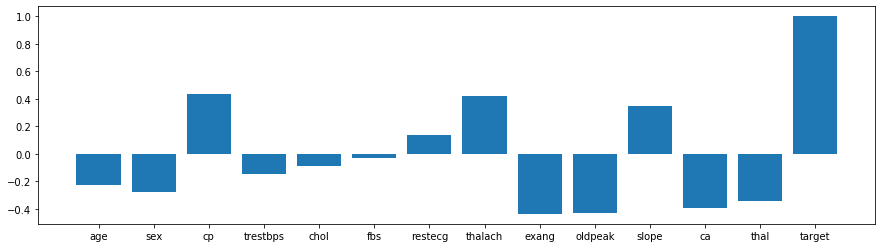

In [17]:
plt.figure(figsize=(15,4))
plt.bar(df.corr().index,df.corr()['target'])

In [35]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

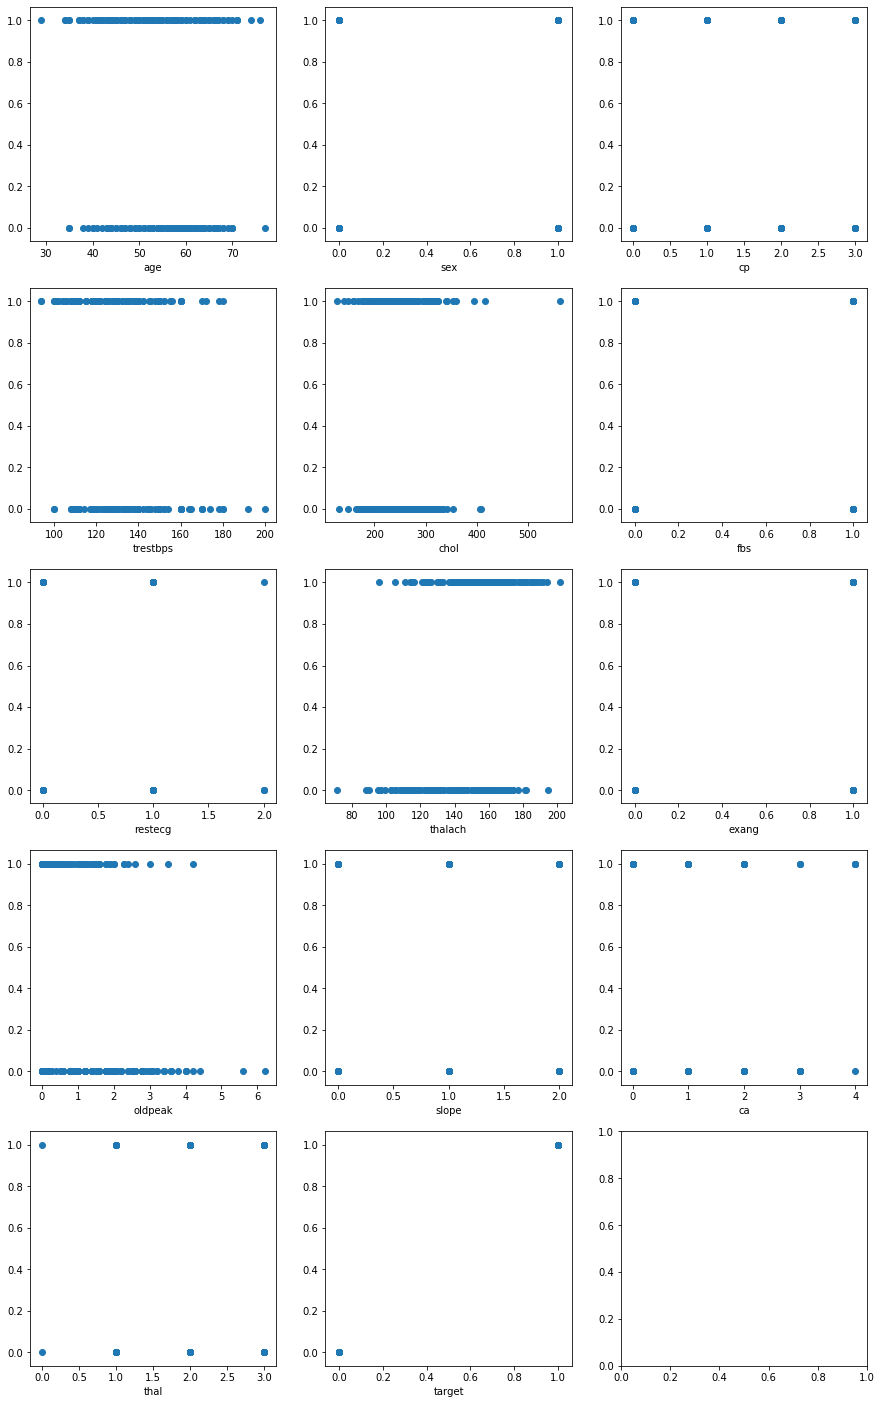

In [47]:
f,ax=plt.subplots(5,3,figsize=(15,25))
k=0
for i in range(5) :
    for j in range(3) :
        ax[i][j].scatter(df.iloc[:,k],df.loc[:,'target'])
        ax[i][j].set_xlabel(df.columns[k])
        k+=1
        if k>13 :
            break
    if k>13 :
        break

In [74]:
df.groupby(['restecg','target']).count().iloc[:,0]

restecg  target
0        0         79
         1         68
1        0         56
         1         96
2        0          3
         1          1
Name: age, dtype: int64


### Metadata

##### age - age in years
##### sex - (1 = male; 0 = female)
##### cp - chest pain type
##### trestbps - resting blood pressure (in mm Hg on admission to the hospital)
##### chol - serum cholestoral in mg/dl
##### fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
##### restecg - resting electrocardiographic results
##### thalach - maximum heart rate achieved
##### exang - exercise induced angina (1 = yes; 0 = no)
##### oldpeak - ST depression induced by exercise relative to rest
##### slope - the slope of the peak exercise ST segment
##### ca - number of major vessels (0-3) colored by flourosopy
##### thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
##### target - have disease or not (1=yes, 0=no)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [76]:
stra=StratifiedShuffleSplit(1,0.2,random_state=10)

In [78]:
for each in stra.split(df.iloc[:,:-1],df.iloc[:,-1]) :
    X_train,y_train,X_test,y_test=df.iloc[each[0],:-1],df.iloc[each[0],-1],df.iloc[each[1],:-1],df.iloc[each[1],-1]

In [83]:
y_test.value_counts()

1    33
0    28
Name: target, dtype: int64

In [105]:
clf=RandomForestClassifier(50,max_depth=3)

clf.fit(X_train,y_train)

print(accuracy_score(y_train,clf.predict(X_train)),accuracy_score(y_test,clf.predict(X_test)))

0.8760330578512396 0.8852459016393442


In [106]:
pd.DataFrame(list(zip(df.columns[:-1],clf.feature_importances_)),columns=['Column','Imp']).sort_values('Imp',ascending=False)

,Column,Imp
12,thal,0.172264
2,cp,0.158985
11,ca,0.140773
9,oldpeak,0.121613
8,exang,0.103928
7,thalach,0.085569
10,slope,0.084726
0,age,0.045685
3,trestbps,0.027325
4,chol,0.024095


### log_loss = -y* log(y_hat)- (1-y)* log(1-y_hat)